In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn import preprocessing

# Iris dataset

## Tabla de contenidos
<a href="#seccion1">DataSet</a>
  - <a href="#seccion2">Regresion Lineal</a>
  - <a href="#seccion5">Regresion Logistica</a>
  - <a href="#seccion4">KNeighborsClassifier</a>
  - <a href="#seccion3">SVM</a>
  - <a href="#seccion6">Clustering</a>

<a id="seccion1"></a>
## DataSet

A continuación, se asignan los nombres de las columnas al dataset.

In [9]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

Haciendo uso de la función **read_csv** se importa el archivo de datos de Iris Flower.

In [12]:
iris = pd.read_csv('iris.csv',names = columns,header=0)

# Importo el dataset como array de numpy
iris_dataset = np.array([ row for row in iris])

### Inspección de datos

In [13]:
iris.head(6)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa


Antes de nada, es conveniente realizar una pequeña **inspección de los datos**. 

En este caso, se ha definido una función que grafica cada característica del dataset en función de las demás de forma automática.

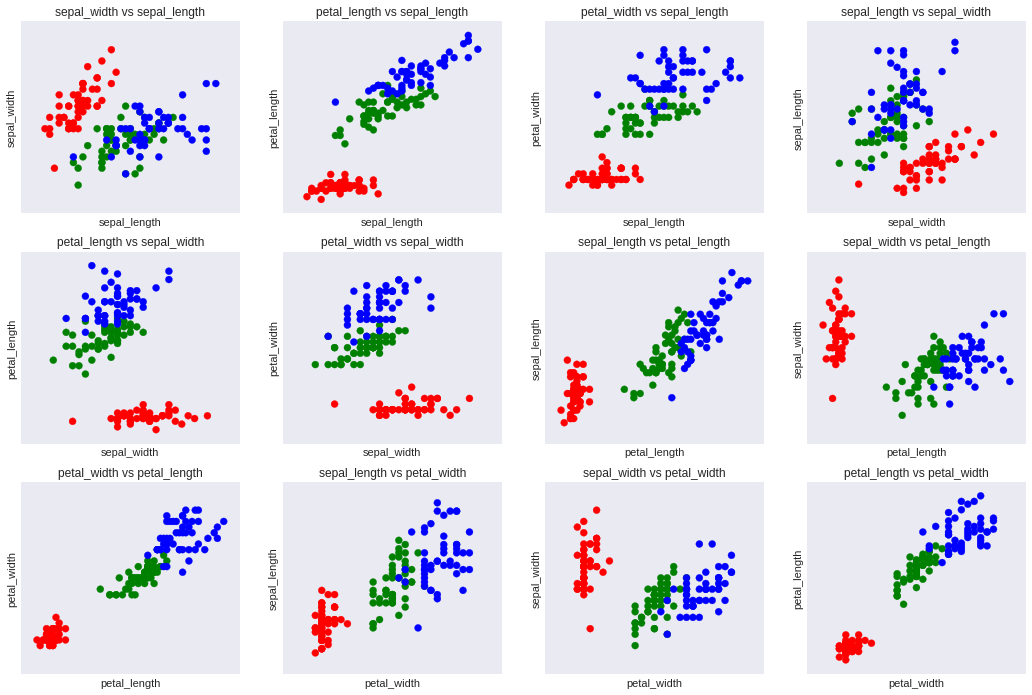

In [14]:
def plotDataset():
    labels = iris['class']
    labelencoder = preprocessing.LabelEncoder()
    labelencoder.fit(labels)
    plot_index = 1
    labels = labelencoder.transform(labels)
    colormap = np.array(['r', 'g', 'b'])
    plt.figure(figsize=(18,12))
    plt.clf()
    for i in range(0,4):
        for j in range(0,4):
            if i != j:  
                x = iris[columns[i]]
                y = iris[columns[j]]
                x_min, x_max = x.min() - .5, x.max() + .5
                y_min, y_max = y.min() - .5, y.max() + .5
                # Plot the training points
                plt.subplot(3, 4, plot_index)
                plt.scatter(x, y, c=colormap[labels], cmap=plt.cm.Paired)
                plt.xlabel(columns[i])
                plt.ylabel(columns[j])
                plt.title(columns[j]+" vs "+columns[i])
                plt.xlim(x_min, x_max)
                plt.ylim(y_min, y_max)
                plt.xticks(())
                plt.yticks(())
                plot_index = plot_index + 1
                
    plt.show()
    
plotDataset()

## Tratamiento de datos

Una vez realizada la gráfica de los datos, conviene **separar los datos en datos de entrenamiento y test**. 

Para ello, se define la función **splitTrainTest**, que recibe un *dataframe* y el porcentaje de datos que serán de entrenamiento y test.


In [15]:
def splitTrainTest(dataframe, percentage=0.6):
    msk = np.random.rand(len(dataframe)) < percentage
    train = dataframe[msk]
    test = dataframe[~msk]
    return train, test

iris_train, iris_test = splitTrainTest(iris)

Tras esto, se separan las 4 primeras columnas (datos numéricos) y la última (labels).

In [16]:
iris_data_train = iris_train.ix[:,0:-1]
iris_data_test = iris_test.ix[:,0:-1]
iris_target_train = iris_train['class']
iris_target_test = iris_test['class']
iris_data_train.shape

(95, 4)

Scikit-Learn no acepta strings como parámetros de funciones, por lo que hay que pasar las etiquetas del atributo class a formato numérico automáticamente.

+ Iris-setosa     -> 0
+ Iris-versicolor -> 1
+ Iris-virginica  -> 2

In [17]:
le_train = preprocessing.LabelEncoder()
le_train.fit(iris_target_train)
iris_target_train_encoded = le_train.transform(iris_target_train)
le_test = preprocessing.LabelEncoder()
le_test.fit(iris_target_test)
iris_target_test_encoded = le_test.transform(iris_target_test)
iris_target_test_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
from sklearn.metrics import accuracy_score, classification_report
target_names = le_test.classes_
print(target_names)
print(classification_report(iris_target_train,iris_target_train, target_names=target_names))

['Setosa' 'Versicolor' 'Virginica']
             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        32
 Versicolor       1.00      1.00      1.00        33
  Virginica       1.00      1.00      1.00        30

avg / total       1.00      1.00      1.00        95



<a id="seccion2"></a>
### Regresion lineal

<a id="seccion5"></a>
### Regresion logistica

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

linear_classifier = LogisticRegression()
linear_scores = cross_val_score(linear_classifier,iris_data_train, iris_target_train_encoded, cv=10)
print("Accuracy (linear):\t%0.2f (+/- %0.2f)" % (linear_scores.mean(), linear_scores.std() * 2))

Accuracy (linear):	0.96 (+/- 0.11)


<a id="seccion4"></a>
### KNeighborsClassifier

Haciendo uso de la función **KNeighborsClassifier()** creamos el modelo. En este caso, los parámetros irán por defecto. Los parámetros se pueden ver en la [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) de la implementación del algoritmo.

In [20]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(iris_data_train, iris_target_train_encoded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
#Predicción
prediction = classifier.predict(iris_data_test)
accuracy = classifier.score(iris_data_test, iris_target_test_encoded)
print ("Predicted model accuracy: "+ str(accuracy))

Predicted model accuracy: 0.945454545455


In [22]:
result = classifier.predict([[3, 5, 4, 2],])
print(result)#1-->versicolor

[1]


In [23]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(iris_target_test_encoded, prediction)
cm

array([[18,  0,  0],
       [ 0, 16,  1],
       [ 0,  2, 18]])

In [24]:
#Matriz de confusión normalizada con valores entre 0 y 1
cm_normalizada = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalizada

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.94117647,  0.05882353],
       [ 0.        ,  0.1       ,  0.9       ]])

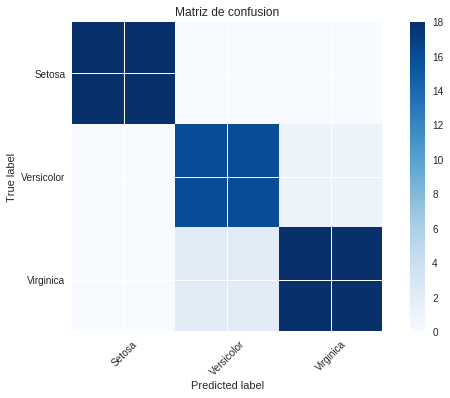

In [25]:
#Gráfica matriz de confusion
def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, le_test.classes_, title='Matriz de confusion')


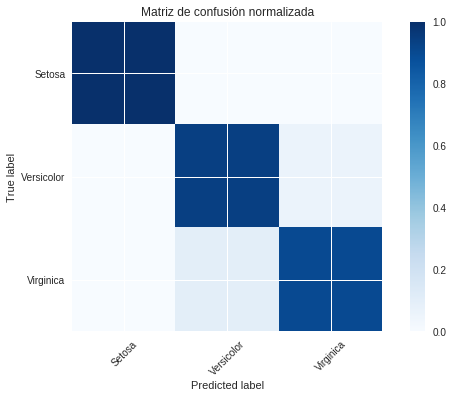

In [26]:
#Matriz de confusión normalizada
plot_confusion_matrix(cm_normalizada, le_test.classes_, title='Matriz de confusión normalizada')

## Probar varios algoritmos para el modelo de KNeighborsClassifier

Algoritmo: auto
Predicted model accuracy: 0.945454545455
[[ 1.          0.          0.        ]
 [ 0.          0.94117647  0.05882353]
 [ 0.          0.1         0.9       ]]


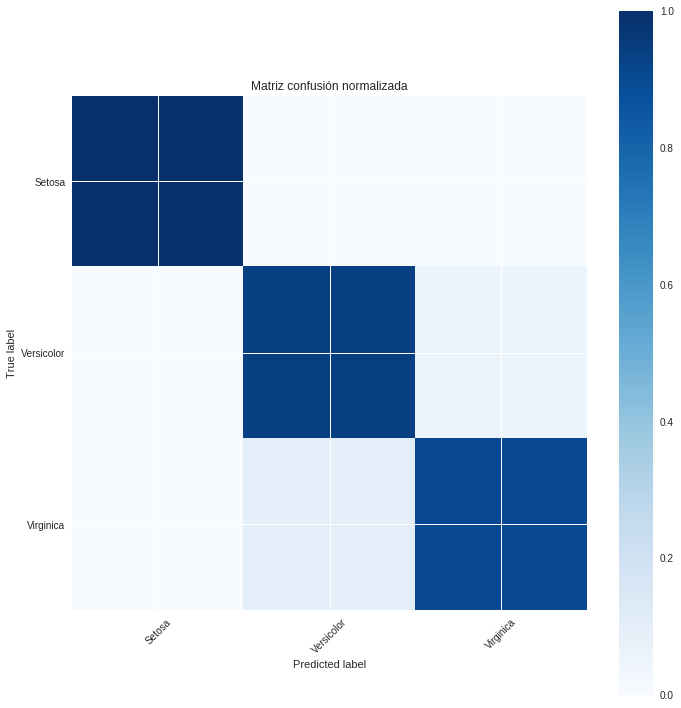

Algoritmo: ball_tree
Predicted model accuracy: 0.945454545455
[[ 1.          0.          0.        ]
 [ 0.          0.94117647  0.05882353]
 [ 0.          0.1         0.9       ]]


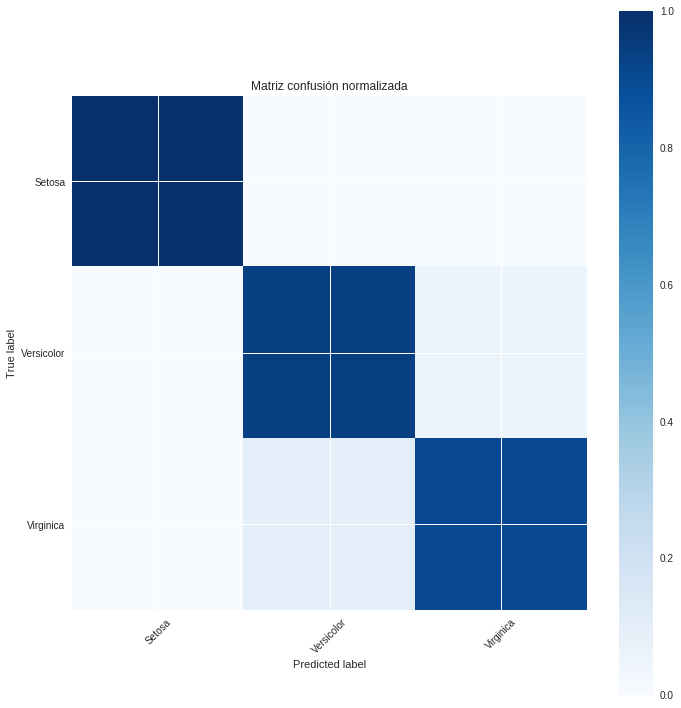

Algoritmo: kd_tree
Predicted model accuracy: 0.945454545455
[[ 1.          0.          0.        ]
 [ 0.          0.94117647  0.05882353]
 [ 0.          0.1         0.9       ]]


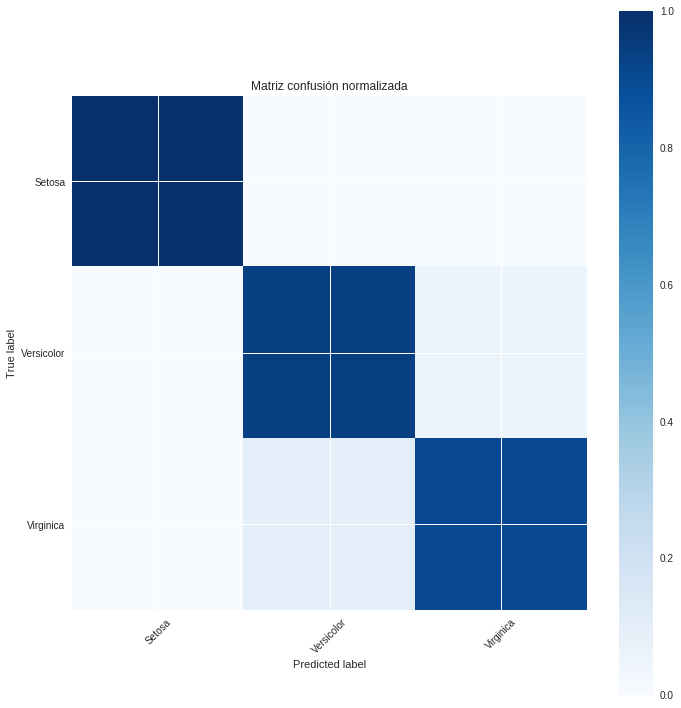

Algoritmo: brute
Predicted model accuracy: 0.945454545455
[[ 1.          0.          0.        ]
 [ 0.          0.94117647  0.05882353]
 [ 0.          0.1         0.9       ]]


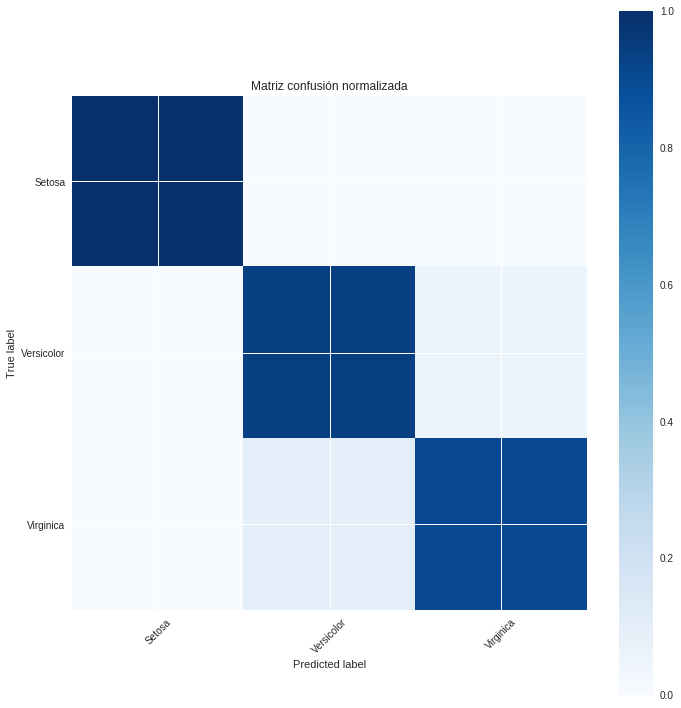

In [27]:
algoritmos = ['auto', 'ball_tree', 'kd_tree', 'brute']

for alg in algoritmos:
    classifier = neighbors.KNeighborsClassifier(algorithm = alg)
    classifier.fit(iris_data_train, iris_target_train_encoded)
    prediction = classifier.predict(iris_data_test)
    accuracy = classifier.score(iris_data_test, iris_target_test_encoded)
    print ("Algoritmo: " + alg)
    print ("Predicted model accuracy: " + str(accuracy))
    cm = confusion_matrix(iris_target_test_encoded, prediction)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm_normalized)
    plt.figure(figsize=(10,10))
    plot_confusion_matrix(cm_normalized, le_test.classes_, title='Matriz confusión normalizada')
    plt.show()

Predicted model accuracy: 0.966101694915
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.08333333  0.91666667]]


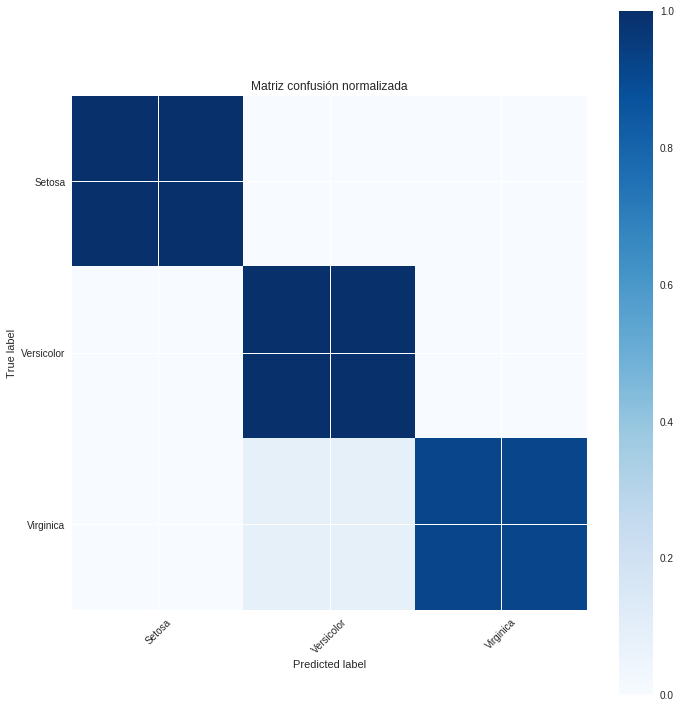

In [25]:
classifier = neighbors.KNeighborsClassifier(10)
classifier.fit(iris_data_train, iris_target_train_encoded)
prediction = classifier.predict(iris_data_test)
accuracy = classifier.score(iris_data_test, iris_target_test_encoded)
print ("Predicted model accuracy: " + str(accuracy))
cm = confusion_matrix(iris_target_test_encoded, prediction)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_normalized, le_test.classes_, title='Matriz confusión normalizada')
plt.show()

Predicted model accuracy: 0.966101694915
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.08333333  0.91666667]]


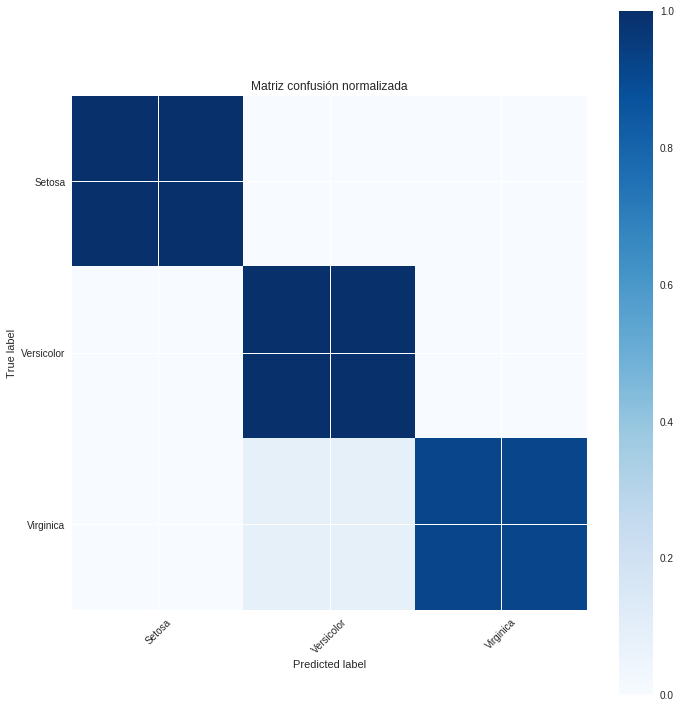

In [41]:
classifier = neighbors.RadiusNeighborsClassifier(1, weights='distance')
classifier.fit(iris_data_train, iris_target_train_encoded)
prediction = classifier.predict(iris_data_test)
accuracy = classifier.score(iris_data_test, iris_target_test_encoded)
print ("Predicted model accuracy: " + str(accuracy))
cm = confusion_matrix(iris_target_test_encoded, prediction)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_normalized, le_test.classes_, title='Matriz confusión normalizada')
plt.show()

<a id="seccion3"></a>
### SVM

In [28]:
from sklearn import datasets, svm

clf = svm.SVC()
clf.fit(iris_data_train, iris_target_train_encoded)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
result = clf.predict([[3, 5, 4, 2],])

print(result)

[2]


In [30]:
result = clf.predict([[5.1, 3.4, 1.2, 0.1],])

print(result)

[0]



# K-means Clustering Iris dataset


Los gráficos muestran los resultados de agrupan mediante el algoritmo K-means utilizando 3,5 y 8 grupos.

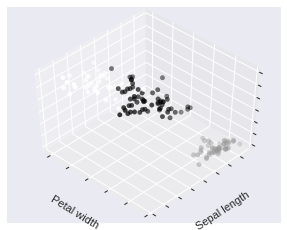

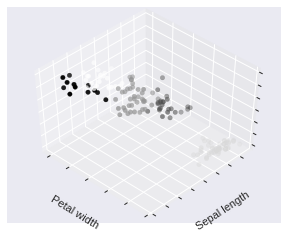

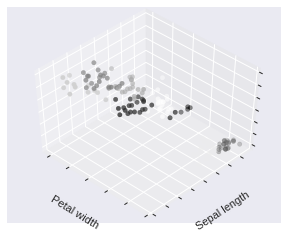

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans, AffinityPropagation
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_5': KMeans(n_clusters=5),
              'k_means_iris_8': KMeans(n_clusters=8)}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [4]:
af = AffinityPropagation(preference=-50).fit(X)

In [5]:
af.cluster_centers_

array([[ 5. ,  3.4,  1.5,  0.2],
       [ 5.7,  2.8,  4.1,  1.3],
       [ 6.5,  3. ,  5.5,  1.8]])

In [6]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

num_clusters = len(cluster_centers_indices)
num_clusters

3

In [7]:
from sklearn import metrics
labels_true = iris.target
print('Estimated number of clusters: %d' % num_clusters)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Score: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information Score: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

Estimated number of clusters: 3
Homogeneity: 0.800
Completeness: 0.805
V-measure: 0.802
Adjusted Rand Score: 0.802
Adjusted Mutual Information Score: 0.798


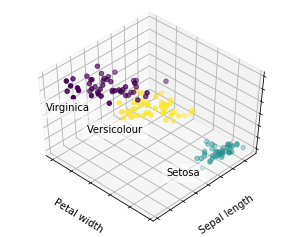

In [8]:
# grafico con la agrupacion ideal de 3 clusters
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

<a id="seccion6"></a>
### Conclusion
- **Regresion**: Generar prediciones continuas (Sistema supervisado)
- **Clasificacion**: Determinar el grupo de cada muestra (Sistema supervisado)
- **Clustering**: Identificar grupos o estructuras ocultas (Sistema sin supervisar)

